In [403]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

from torch.autograd import Variable

**Create the Fully Connected Feed Forward Neural Network**

In [404]:
class IrisNet(nn.Module):
    
    def __init__(self):
        
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 100)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(100, 50)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(50, 3)  
    
    def forward(self, x):
        X = self.fc1(x)
        X = self.relu1(X)
        X = self.fc2(X)
        X = self.relu2(X)
        X = self.fc3(X)
        return X

**Create the DataLoader**

In [405]:
iris = pd.read_csv('data/iris.data.txt')
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [406]:
mappings = {
   'Iris-setosa': 0,
   'Iris-versicolor': 1,
   'Iris-virginica': 2
}
iris['class'] = iris['class'].apply(lambda x: mappings[x])

In [407]:
X = iris.drop('class', axis=1).values
y = iris['class'].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.8)

train_X = Variable(torch.Tensor(train_X).float())
test_X = Variable(torch.Tensor(test_X).float())
train_y = Variable(torch.Tensor(train_y).long())
test_y = Variable(torch.Tensor(test_y).long())

**Instantiate the dataframe, the loss function and the optimizer**

In [408]:
# Our model
net = IrisNet()

# Out loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)  

**Train the neural network**

**Backpropegation:** <br>
A link that helped me understand it - <br>
https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c <br>

**Activation function:** <br>
ReLU is the most commonly used activation that has less drawbacks than sigmoid. <br>
Link that helped me understand it - <br>

**Loss function:**
I chose the cross entropy loss function because 
<br>
Link that helped me understand it - <br>

**Optimizer:** <br>
The Stocastic gradient descent was chosen because -
<br>
Link that helped me understand it - <br>


In [409]:
num_epochs = 500

train_loss = []
test_loss = []

for epoch in range(num_epochs):
    net.train()           # Put the network into training mode
    optimizer.zero_grad() # Clear off the gradients from any past operation
    output = net(train_X) # Do the forward pass
    loss = criterion(output, train_y) # Calculate the loss
    loss.backward()       # Calculate the gradients with help of back propagation      
    optimizer.step()      # Ask the optimizer to adjust the parameters based on the gradients
    
    if epoch % 10 == 0:
        print ('number of epoch', epoch, 'loss', loss.data)

    net.eval()                # Put the network into evaluation mode
    
    # Book keeping
    
    # Record the loss of training data
    train_loss.append(loss.data) 
    
    # Record the loss of training data
    outputs = net(Variable(test_X))
    loss = criterion(outputs, Variable(test_y))
    test_loss.append(loss.data)

number of epoch 0 loss tensor(1.1261)
number of epoch 10 loss tensor(1.0122)
number of epoch 20 loss tensor(0.9715)
number of epoch 30 loss tensor(0.9297)
number of epoch 40 loss tensor(0.8863)
number of epoch 50 loss tensor(0.8413)
number of epoch 60 loss tensor(0.7954)
number of epoch 70 loss tensor(0.7450)
number of epoch 80 loss tensor(0.7004)
number of epoch 90 loss tensor(0.6591)
number of epoch 100 loss tensor(0.6210)
number of epoch 110 loss tensor(0.5868)
number of epoch 120 loss tensor(0.5563)
number of epoch 130 loss tensor(0.5290)
number of epoch 140 loss tensor(0.5045)
number of epoch 150 loss tensor(0.4825)
number of epoch 160 loss tensor(0.4626)
number of epoch 170 loss tensor(0.4430)
number of epoch 180 loss tensor(0.4260)
number of epoch 190 loss tensor(0.4104)
number of epoch 200 loss tensor(0.3958)
number of epoch 210 loss tensor(0.3820)
number of epoch 220 loss tensor(0.3691)
number of epoch 230 loss tensor(0.3569)
number of epoch 240 loss tensor(0.3452)
number of e

**Plot loss per iteration**

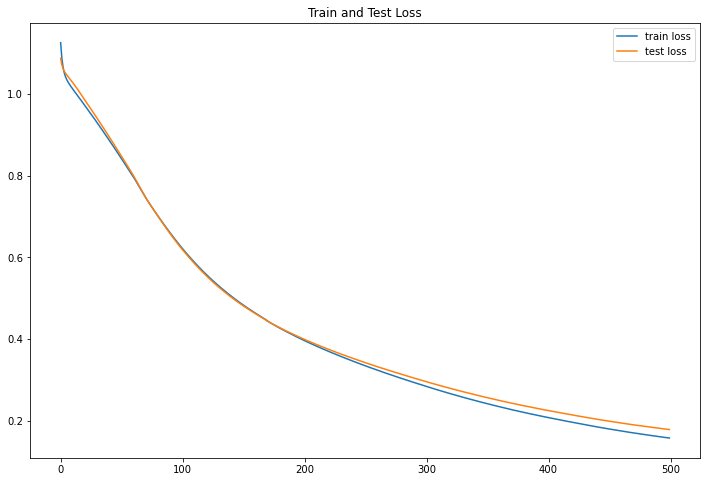

In [410]:
fig = plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.title("Train and Test Loss")
plt.legend()
plt.show()

In [411]:
predict_out = net(test_X)
_, predict_y = torch.max(predict_out, 1)

print('prediction accuracy', accuracy_score(test_y.data, predict_y.data))

print('precision', precision_score(test_y.data, predict_y.data, average='micro'))
print('recall', recall_score(test_y.data, predict_y.data, average='micro'))

prediction accuracy 0.9833333333333333
precision 0.9833333333333333
recall 0.9833333333333333
